In [1]:
import pandas as pd
from urllib.request import urlopen

import matplotlib.pyplot as plt
from PIL import Image

from mplsoccer import PyPizza, add_image, FontManager

C:\Users\Louis\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
#possession and npxG for
#url = 'https://fbref.com/en/comps/1/stats/World-Cup-Stats'
url= 'https://fbref.com/en/comps/676/2021/stats/2021-European-Championship-Stats'

df = pd.read_html(url, attrs={'id': 'stats_squads_standard_for'})[0]
df = df[df.columns.drop(list(df.filter(regex='Per 90')))]
df = df.droplevel(0, axis=1)

standfor = df[['Squad','Poss','90s','npxG']]
standfor['npxG/90'] = standfor['npxG']/standfor['90s']
standfor.head()

C:\Users\Louis\AppData\Local\Temp\ipykernel_11180\155114651.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  standfor['npxG/90'] = standfor['npxG']/standfor['90s']


,Squad,Poss,90s,npxG,npxG/90
0,at Austria,53.5,4.3,5.1,1.186047
1,be Belgium,53.8,5.0,5.1,1.020000
2,hr Croatia,50.0,4.3,5.5,1.279070
3,cz Czechia,48.2,5.0,5.4,1.080000
4,dk Denmark,53.3,6.3,9.2,1.460317


In [3]:
#possession and npxG against
#url1 = 'https://fbref.com/en/comps/1/stats/World-Cup-Stats'
url1='https://fbref.com/en/comps/676/2021/stats/2021-European-Championship-Stats'

df1 = pd.read_html(url, attrs={'id': 'stats_squads_standard_against'})[0]
df1 = df1[df1.columns.drop(list(df1.filter(regex='Per 90')))]
df1 = df1.droplevel(0, axis=1)

standag = df1[['Squad','90s','npxG']]
standag['npxG/90'] = standag['npxG']/standag['90s']

stand = pd.merge(standfor, standag, left_index=True, right_index=True, suffixes=('', '_opp'))
stand.drop(columns=['90s','npxG','Squad_opp','90s_opp','npxG_opp'], inplace=True)

stand.head()

C:\Users\Louis\AppData\Local\Temp\ipykernel_11180\3789151579.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  standag['npxG/90'] = standag['npxG']/standag['90s']


,Squad,Poss,npxG/90,npxG/90_opp
0,at Austria,53.5,1.186047,1.162791
1,be Belgium,53.8,1.020000,1.080000
2,hr Croatia,50.0,1.279070,1.674419
3,cz Czechia,48.2,1.080000,1.320000
4,dk Denmark,53.3,1.460317,0.857143


In [4]:
#passing stats for
#url = 'https://fbref.com/en/comps/1/passing/World-Cup-Stats'
url='https://fbref.com/en/comps/676/2021/passing/2021-European-Championship-Stats'

df2 = pd.read_html(url, attrs={'id': 'stats_squads_passing_for'})[0]
df2 = df2.droplevel(0, axis=1)
cols = []
count = 1
for column in df2.columns:
    if column == 'Att':
        cols.append(f'Att_{count}')
        count+=1
        continue
    cols.append(column)
df2.columns = cols
passfor = df2[['Squad','Att_1','TotDist','PrgDist']]
passfor.head()

,Squad,Att_1,TotDist,PrgDist
0,at Austria,2362,33358,11971
1,be Belgium,3056,45086,14143
2,hr Croatia,2123,28290,9502
3,cz Czechia,2284,29339,11276
4,dk Denmark,3224,44015,16069


In [5]:
#passing stats against
#url = 'https://fbref.com/en/comps/1/passing/World-Cup-Stats'
url='https://fbref.com/en/comps/676/2021/passing/2021-European-Championship-Stats'

df3 = pd.read_html(url, attrs={'id': 'stats_squads_passing_against'})[0]
df3 = df3.droplevel(0, axis=1)
cols = []
count = 1
for column in df3.columns:
    if column == 'Att':
        cols.append(f'Att_{count}')
        count+=1
        continue
    cols.append(column)
df3.columns = cols
passag = df3[['Squad','Att_1']]

passf = pd.merge(passfor, passag, left_index=True, right_index=True, suffixes=('', '_opp'))
passf.drop(columns=['Squad_opp'], inplace=True)
passf.head()

,Squad,Att_1,TotDist,PrgDist,Att_1_opp
0,at Austria,2362,33358,11971,2106
1,be Belgium,3056,45086,14143,2601
2,hr Croatia,2123,28290,9502,2261
3,cz Czechia,2284,29339,11276,2462
4,dk Denmark,3224,44015,16069,2943


In [6]:
#merge stand and passf
standpass = pd.merge(passf, stand, left_index=True, right_index=True)
standpass.drop(columns=['Squad_y'], inplace=True)
standpass.head()

,Squad_x,Att_1,TotDist,PrgDist,Att_1_opp,Poss,npxG/90,npxG/90_opp
0,at Austria,2362,33358,11971,2106,53.5,1.186047,1.162791
1,be Belgium,3056,45086,14143,2601,53.8,1.020000,1.080000
2,hr Croatia,2123,28290,9502,2261,50.0,1.279070,1.674419
3,cz Czechia,2284,29339,11276,2462,48.2,1.080000,1.320000
4,dk Denmark,3224,44015,16069,2943,53.3,1.460317,0.857143


In [7]:
standpass['circulate']=standpass['PrgDist']*100/standpass['TotDist']
standpass.head()

,Squad_x,Att_1,TotDist,PrgDist,Att_1_opp,Poss,npxG/90,npxG/90_opp,circulate
0,at Austria,2362,33358,11971,2106,53.5,1.186047,1.162791,35.886444
1,be Belgium,3056,45086,14143,2601,53.8,1.020000,1.080000,31.368939
2,hr Croatia,2123,28290,9502,2261,50.0,1.279070,1.674419,33.587840
3,cz Czechia,2284,29339,11276,2462,48.2,1.080000,1.320000,38.433484
4,dk Denmark,3224,44015,16069,2943,53.3,1.460317,0.857143,36.508009


In [8]:
#GK stats
#passing stats for
#url = 'https://fbref.com/en/comps/1/keepersadv/World-Cup-Stats'
url='https://fbref.com/en/comps/676/2021/keepersadv/2021-European-Championship-Stats'

df4 = pd.read_html(url, attrs={'id': 'stats_squads_keeper_adv_for'})[0]
df4 = df4.droplevel(0, axis=1)
cols = []
count = 1
for column in df4.columns:
    if column == 'Launch%':
        cols.append(f'Launch%_{count}')
        count+=1
        continue
    cols.append(column)
df4.columns = cols
df4.head()
GK = df4[['Squad','Launch%_1']]
GK.head()

,Squad,Launch%_1
0,at Austria,36.1
1,be Belgium,26.8
2,hr Croatia,35.8
3,cz Czechia,44.8
4,dk Denmark,50.8


In [9]:
#merge standpass and GK
standpassgk = pd.merge(standpass, GK, left_index=True, right_index=True)
standpassgk.drop(columns=['Squad','TotDist','PrgDist'], inplace=True)
standpassgk.head()

,Squad_x,Att_1,Att_1_opp,Poss,npxG/90,npxG/90_opp,circulate,Launch%_1
0,at Austria,2362,2106,53.5,1.186047,1.162791,35.886444,36.1
1,be Belgium,3056,2601,53.8,1.020000,1.080000,31.368939,26.8
2,hr Croatia,2123,2261,50.0,1.279070,1.674419,33.587840,35.8
3,cz Czechia,2284,2462,48.2,1.080000,1.320000,38.433484,44.8
4,dk Denmark,3224,2943,53.3,1.460317,0.857143,36.508009,50.8


In [10]:
#defensive stats for
#url = 'https://fbref.com/en/comps/1/defense/World-Cup-Stats'
url='https://fbref.com/en/comps/676/2021/defense/2021-European-Championship-Stats'

df5 = pd.read_html(url, attrs={'id': 'stats_squads_defense_for'})[0]
df5 = df5.droplevel(0, axis=1)
deffor = df5[['Squad','Def 3rd','Mid 3rd','Att 3rd','Att','Tkl+Int']]
deffor.head()

,Squad,Def 3rd,Mid 3rd,Att 3rd,Att,Tkl+Int
0,at Austria,42,32,8,75,122
1,be Belgium,41,26,4,77,107
2,hr Croatia,25,19,5,48,84
3,cz Czechia,25,28,16,78,119
4,dk Denmark,44,36,5,76,152


In [11]:
#def stats against
#url = 'https://fbref.com/en/comps/1/defense/World-Cup-Stats'
url='https://fbref.com/en/comps/676/2021/defense/2021-European-Championship-Stats'

df6 = pd.read_html(url, attrs={'id': 'stats_squads_defense_against'})[0]
df6 = df6.droplevel(0, axis=1)
defag = df6[['Squad','Att','Tkl+Int']]
defag.head()

,Squad,Att,Tkl+Int
0,at vs Austria,56,106
1,be vs Belgium,98,132
2,hr vs Croatia,64,92
3,cz vs Czechia,48,111
4,dk vs Denmark,104,156


In [12]:
#merge def stats
deff = pd.merge(deffor, defag, left_index=True, right_index=True, suffixes=('', '_opp'))
deff.drop(columns=['Squad_opp'], inplace=True)
deff.head()

,Squad,Def 3rd,Mid 3rd,Att 3rd,Att,Tkl+Int,Att_opp,Tkl+Int_opp
0,at Austria,42,32,8,75,122,56,106
1,be Belgium,41,26,4,77,107,98,132
2,hr Croatia,25,19,5,48,84,64,92
3,cz Czechia,25,28,16,78,119,48,111
4,dk Denmark,44,36,5,76,152,104,156


In [13]:
#add def to main df
standpassdef = pd.merge(standpassgk, deff, left_index=True, right_index=True)
standpassdef.drop(columns=['Squad'], inplace=True)
standpassdef.head()

,Squad_x,Att_1,Att_1_opp,Poss,npxG/90,npxG/90_opp,circulate,Launch%_1,Def 3rd,Mid 3rd,Att 3rd,Att,Tkl+Int,Att_opp,Tkl+Int_opp
0,at Austria,2362,2106,53.5,1.186047,1.162791,35.886444,36.1,42,32,8,75,122,56,106
1,be Belgium,3056,2601,53.8,1.020000,1.080000,31.368939,26.8,41,26,4,77,107,98,132
2,hr Croatia,2123,2261,50.0,1.279070,1.674419,33.587840,35.8,25,19,5,48,84,64,92
3,cz Czechia,2284,2462,48.2,1.080000,1.320000,38.433484,44.8,25,28,16,78,119,48,111
4,dk Denmark,3224,2943,53.3,1.460317,0.857143,36.508009,50.8,44,36,5,76,152,104,156


In [14]:
standpassdef['Press resistance']=standpassdef['Att_1']/(standpassdef['Tkl+Int_opp']+standpassdef['Att_opp'])
standpassdef['Press intensity']=standpassdef['Att_1_opp']/(standpassdef['Tkl+Int']+standpassdef['Att'])
standpassdef.drop(columns=['Tkl+Int_opp','Att_opp','Tkl+Int','Att'], inplace=True)
standpassdef.head()

,Squad_x,Att_1,Att_1_opp,Poss,npxG/90,npxG/90_opp,circulate,Launch%_1,Def 3rd,Mid 3rd,Att 3rd,Press resistance,Press intensity
0,at Austria,2362,2106,53.5,1.186047,1.162791,35.886444,36.1,42,32,8,14.580247,10.690355
1,be Belgium,3056,2601,53.8,1.020000,1.080000,31.368939,26.8,41,26,4,13.286957,14.135870
2,hr Croatia,2123,2261,50.0,1.279070,1.674419,33.587840,35.8,25,19,5,13.608974,17.128788
3,cz Czechia,2284,2462,48.2,1.080000,1.320000,38.433484,44.8,25,28,16,14.364780,12.497462
4,dk Denmark,3224,2943,53.3,1.460317,0.857143,36.508009,50.8,44,36,5,12.400000,12.907895


In [15]:
#passing stats for
#url = 'https://fbref.com/en/comps/1/possession/World-Cup-Stats'
url='https://fbref.com/en/comps/676/2021/possession/2021-European-Championship-Stats'

df7 = pd.read_html(url, attrs={'id': 'stats_squads_possession_for'})[0]
df7 = df7.droplevel(0, axis=1)
possfor = df7[['Squad','Att 3rd']]
possfor.head()

,Squad,Att 3rd
0,at Austria,685
1,be Belgium,737
2,hr Croatia,500
3,cz Czechia,703
4,dk Denmark,1005


In [16]:
#passing stats against
#url = 'https://fbref.com/en/comps/1/possession/World-Cup-Stats'
url='https://fbref.com/en/comps/676/2021/possession/2021-European-Championship-Stats'

df8 = pd.read_html(url, attrs={'id': 'stats_squads_possession_against'})[0]
df8 = df8.droplevel(0, axis=1)
possag = df8[['Squad','Att 3rd']]
possag.head()

,Squad,Att 3rd
0,at vs Austria,557
1,be vs Belgium,818
2,hr vs Croatia,580
3,cz vs Czechia,641
4,dk vs Denmark,790


In [17]:
#merge poss stats
poss = pd.merge(possfor, possag, left_index=True, right_index=True, suffixes=('', '_opp'))
poss.drop(columns=['Squad_opp'], inplace=True)
poss = poss.rename(columns={'Att 3rd': 'Att 3rd touch', 'Att 3rd_opp': 'Att 3rd touch_opp'})
poss.head()

,Squad,Att 3rd touch,Att 3rd touch_opp
0,at Austria,685,557
1,be Belgium,737,818
2,hr Croatia,500,580
3,cz Czechia,703,641
4,dk Denmark,1005,790


In [18]:
#merge in poss stats
standpassdefposs = pd.merge(standpassdef, poss, left_index=True, right_index=True)
standpassdefposs.drop(columns=['Squad'], inplace=True)
standpassdefposs['Field tilt']=standpassdefposs['Att 3rd touch']/(standpassdefposs['Att 3rd touch']+standpassdefposs['Att 3rd touch_opp'])*100
standpassdefposs.drop(columns=['Att 3rd touch_opp'], inplace=True)
standpassdefposs.head()

,Squad_x,Att_1,Att_1_opp,Poss,npxG/90,npxG/90_opp,circulate,Launch%_1,Def 3rd,Mid 3rd,Att 3rd,Press resistance,Press intensity,Att 3rd touch,Field tilt
0,at Austria,2362,2106,53.5,1.186047,1.162791,35.886444,36.1,42,32,8,14.580247,10.690355,685,55.152979
1,be Belgium,3056,2601,53.8,1.020000,1.080000,31.368939,26.8,41,26,4,13.286957,14.135870,737,47.395498
2,hr Croatia,2123,2261,50.0,1.279070,1.674419,33.587840,35.8,25,19,5,13.608974,17.128788,500,46.296296
3,cz Czechia,2284,2462,48.2,1.080000,1.320000,38.433484,44.8,25,28,16,14.364780,12.497462,703,52.306548
4,dk Denmark,3224,2943,53.3,1.460317,0.857143,36.508009,50.8,44,36,5,12.400000,12.907895,1005,55.988858


In [19]:
#add pass types
#url = 'https://fbref.com/en/comps/1/passing_types/World-Cup-Stats'
url='https://fbref.com/en/comps/676/2021/passing_types/2021-European-Championship-Stats'

df9 = pd.read_html(url, attrs={'id': 'stats_squads_passing_types_for'})[0]
df9 = df9.droplevel(0, axis=1)
posstype = df9[['Squad','Crs']]

euros = pd.merge(standpassdefposs, posstype, left_index=True, right_index=True)
euros.drop(columns=['Squad'], inplace=True)
euros['Central prog']=euros['Crs']/euros['Att_1']*100
euros.drop(columns=['Crs'], inplace=True)
euros.head()

,Squad_x,Att_1,Att_1_opp,Poss,npxG/90,npxG/90_opp,circulate,Launch%_1,Def 3rd,Mid 3rd,Att 3rd,Press resistance,Press intensity,Att 3rd touch,Field tilt,Central prog
0,at Austria,2362,2106,53.5,1.186047,1.162791,35.886444,36.1,42,32,8,14.580247,10.690355,685,55.152979,3.048264
1,be Belgium,3056,2601,53.8,1.020000,1.080000,31.368939,26.8,41,26,4,13.286957,14.135870,737,47.395498,1.799738
2,hr Croatia,2123,2261,50.0,1.279070,1.674419,33.587840,35.8,25,19,5,13.608974,17.128788,500,46.296296,2.213848
3,cz Czechia,2284,2462,48.2,1.080000,1.320000,38.433484,44.8,25,28,16,14.364780,12.497462,703,52.306548,4.203152
4,dk Denmark,3224,2943,53.3,1.460317,0.857143,36.508009,50.8,44,36,5,12.400000,12.907895,1005,55.988858,3.970223


In [20]:
#add shooting
#url = 'https://fbref.com/en/comps/1/shooting/World-Cup-Stats'
url='https://fbref.com/en/comps/676/2021/shooting/2021-European-Championship-Stats'

df10 = pd.read_html(url, attrs={'id': 'stats_squads_shooting_for'})[0]
df10 = df10.droplevel(0, axis=1)
europiz = df10[['Squad','npxG/Sh','Sh']]
europiz.head()

,Squad,npxG/Sh,Sh
0,at Austria,0.10,53
1,be Belgium,0.11,47
2,hr Croatia,0.16,42
3,cz Czechia,0.10,55
4,dk Denmark,0.10,91


In [21]:
#merge in shooting data
pizza = pd.merge(euros, europiz, left_index=True, right_index=True)
pizza.drop(columns=['Squad'], inplace=True)
pizza['Patient attack']=pizza['Sh']/pizza['Att 3rd touch']*100
pizza.drop(columns=['Att_1','Att_1_opp','Att 3rd touch','Sh'], inplace=True)
pizza.head()

,Squad_x,Poss,npxG/90,npxG/90_opp,circulate,Launch%_1,Def 3rd,Mid 3rd,Att 3rd,Press resistance,Press intensity,Field tilt,Central prog,npxG/Sh,Patient attack
0,at Austria,53.5,1.186047,1.162791,35.886444,36.1,42,32,8,14.580247,10.690355,55.152979,3.048264,0.10,7.737226
1,be Belgium,53.8,1.020000,1.080000,31.368939,26.8,41,26,4,13.286957,14.135870,47.395498,1.799738,0.11,6.377205
2,hr Croatia,50.0,1.279070,1.674419,33.587840,35.8,25,19,5,13.608974,17.128788,46.296296,2.213848,0.16,8.400000
3,cz Czechia,48.2,1.080000,1.320000,38.433484,44.8,25,28,16,14.364780,12.497462,52.306548,4.203152,0.10,7.823613
4,dk Denmark,53.3,1.460317,0.857143,36.508009,50.8,44,36,5,12.400000,12.907895,55.988858,3.970223,0.10,9.054726


In [22]:
#calculate defensive height
pizza['Def 3rd tackles'] = pizza['Def 3rd'] / (pizza['Def 3rd'] + pizza['Mid 3rd'] + pizza['Att 3rd']) 
pizza['Mid 3rd tackles'] = pizza['Mid 3rd'] / (pizza['Def 3rd'] + pizza['Mid 3rd'] + pizza['Att 3rd']) 
pizza['Att 3rd tackles'] = pizza['Att 3rd'] / (pizza['Def 3rd'] + pizza['Mid 3rd'] + pizza['Att 3rd']) 
pizza['Defensive height'] = (pizza['Def 3rd tackles']*16.5*1.1) + (pizza['Mid 3rd tackles']*49.5*1.1) + (pizza['Att 3rd tackles']*82.5*1.1)
pizza.drop(columns=['Def 3rd','Mid 3rd','Att 3rd','Def 3rd tackles','Mid 3rd tackles','Att 3rd tackles'], inplace=True)
pizza.head()

,Squad_x,Poss,npxG/90,npxG/90_opp,circulate,Launch%_1,Press resistance,Press intensity,Field tilt,Central prog,npxG/Sh,Patient attack,Defensive height
0,at Austria,53.5,1.186047,1.162791,35.886444,36.1,14.580247,10.690355,55.152979,3.048264,0.10,7.737226,39.398780
1,be Belgium,53.8,1.020000,1.080000,31.368939,26.8,13.286957,14.135870,47.395498,1.799738,0.11,6.377205,35.533099
2,hr Croatia,50.0,1.279070,1.674419,33.587840,35.8,13.608974,17.128788,46.296296,2.213848,0.16,8.400000,39.633673
3,cz Czechia,48.2,1.080000,1.320000,38.433484,44.8,14.364780,12.497462,52.306548,4.203152,0.10,7.823613,49.715217
4,dk Denmark,53.3,1.460317,0.857143,36.508009,50.8,12.400000,12.907895,55.988858,3.970223,0.10,9.054726,37.794706


In [23]:
#tidy column names
pizza = pizza.rename(columns={'Squad_x': 'Squad', 'Poss': 'Possession','npxG/90':'Chance creation','npxG/90_opp':'Chance prevention','circulate':'Circulate','Launch%_1':'Deep buildup','Central prog':'Central progression','npxG/Sh':'Shot quality'})
pizza.head()

,Squad,Possession,Chance creation,Chance prevention,Circulate,Deep buildup,Press resistance,Press intensity,Field tilt,Central progression,Shot quality,Patient attack,Defensive height
0,at Austria,53.5,1.186047,1.162791,35.886444,36.1,14.580247,10.690355,55.152979,3.048264,0.10,7.737226,39.398780
1,be Belgium,53.8,1.020000,1.080000,31.368939,26.8,13.286957,14.135870,47.395498,1.799738,0.11,6.377205,35.533099
2,hr Croatia,50.0,1.279070,1.674419,33.587840,35.8,13.608974,17.128788,46.296296,2.213848,0.16,8.400000,39.633673
3,cz Czechia,48.2,1.080000,1.320000,38.433484,44.8,14.364780,12.497462,52.306548,4.203152,0.10,7.823613,49.715217
4,dk Denmark,53.3,1.460317,0.857143,36.508009,50.8,12.400000,12.907895,55.988858,3.970223,0.10,9.054726,37.794706


In [24]:
pizza['Keeping the ball'] = pizza['Possession'].rank(pct=True)
pizza['High line'] = pizza['Defensive height'].rank(pct=True)
pizza['Passing under pressure'] = pizza['Press resistance'].rank(pct=True)
pizza['Positional dominance'] = pizza['Field tilt'].rank(pct=True)
pizza['Creativity'] = pizza['Chance creation'].rank(pct=True)
pizza['Shooting'] = pizza['Shot quality'].rank(pct=True)
pizza['Defensive solidity'] = pizza['Chance prevention'].rank(pct=True, ascending=False)
pizza['Pressing'] = pizza['Press intensity'].rank(pct=True, ascending=False)
pizza['Pass out from back'] = pizza['Deep buildup'].rank(pct=True, ascending=False)
pizza['Progress through middle'] = pizza['Central progression'].rank(pct=True, ascending=False)
pizza['Directness'] = pizza['Circulate'].rank(pct=True, ascending=False)
pizza['Attacking patience'] = pizza['Patient attack'].rank(pct=True, ascending=False)
pizza.head()

,Squad,Possession,Chance creation,Chance prevention,Circulate,Deep buildup,Press resistance,Press intensity,Field tilt,Central progression,...,Passing under pressure,Positional dominance,Creativity,Shooting,Defensive solidity,Pressing,Pass out from back,Progress through middle,Directness,Attacking patience
0,at Austria,53.5,1.186047,1.162791,35.886444,36.1,14.580247,10.690355,55.152979,3.048264,...,0.666667,0.708333,0.541667,0.3750,0.625000,0.958333,0.625000,0.416667,0.541667,0.583333
1,be Belgium,53.8,1.020000,1.080000,31.368939,26.8,13.286957,14.135870,47.395498,1.799738,...,0.375000,0.500000,0.291667,0.5625,0.708333,0.333333,0.833333,1.000000,0.833333,0.875000
2,hr Croatia,50.0,1.279070,1.674419,33.587840,35.8,13.608974,17.128788,46.296296,2.213848,...,0.416667,0.458333,0.583333,0.9375,0.250000,0.166667,0.666667,0.791667,0.625000,0.416667
3,cz Czechia,48.2,1.080000,1.320000,38.433484,44.8,14.364780,12.497462,52.306548,4.203152,...,0.583333,0.625000,0.458333,0.3750,0.416667,0.791667,0.416667,0.125000,0.125000,0.500000
4,dk Denmark,53.3,1.460317,0.857143,36.508009,50.8,12.400000,12.907895,55.988858,3.970223,...,0.208333,0.791667,0.750000,0.3750,0.875000,0.750000,0.291667,0.166667,0.458333,0.333333


In [25]:
pizza.columns.values

array(['Squad', 'Possession', 'Chance creation', 'Chance prevention',
       'Circulate', 'Deep buildup', 'Press resistance', 'Press intensity',
       'Field tilt', 'Central progression', 'Shot quality',
       'Patient attack', 'Defensive height', 'Keeping the ball',
       'High line', 'Passing under pressure', 'Positional dominance',
       'Creativity', 'Shooting', 'Defensive solidity', 'Pressing',
       'Pass out from back', 'Progress through middle', 'Directness',
       'Attacking patience'], dtype=object)

In [26]:
percent=pizza[['Squad','High line',
       'Positional dominance', 'Creativity', 'Shooting',
       'Defensive solidity', 'Pressing', 'Pass out from back',
       'Progress through middle', 'Directness', 'Attacking patience',
       'Keeping the ball', 'Passing under pressure']]
percent['Chance prevention'] = pizza['Defensive solidity']*100
percent['Press intensity'] = pizza['Pressing']*100
percent['Defensive height'] = pizza['High line']*100
percent['Chance creation'] = pizza['Creativity']*100
percent['Patient attack'] = pizza['Attacking patience']*100
percent['Shot quality'] = pizza['Shooting']*100
percent['Possession'] = pizza['Keeping the ball']*100
percent['Press resistance'] = pizza['Passing under pressure']*100
percent['Deep build-up'] = pizza['Pass out from back']*100
percent['Field tilt'] = pizza['Positional dominance']*100
percent['Circulate'] = pizza['Directness']*100
percent['Central progression'] = pizza['Progress through middle']*100
percent=percent.round()
#final df
final_df=percent[['Squad','Chance prevention','Press intensity','Defensive height','Chance creation','Patient attack','Shot quality','Possession','Press resistance','Deep build-up','Field tilt','Circulate','Central progression']]
final_df.head(15)

C:\Users\Louis\AppData\Local\Temp\ipykernel_11180\1790304232.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  percent['Chance prevention'] = pizza['Defensive solidity']*100
C:\Users\Louis\AppData\Local\Temp\ipykernel_11180\1790304232.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  percent['Press intensity'] = pizza['Pressing']*100
C:\Users\Louis\AppData\Local\Temp\ipykernel_11180\1790304232.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

,Squad,Chance prevention,Press intensity,Defensive height,Chance creation,Patient attack,Shot quality,Possession,Press resistance,Deep build-up,Field tilt,Circulate,Central progression
0,at Austria,62.0,96.0,48.0,54.0,58.0,38.0,75.0,67.0,62.0,71.0,54.0,42.0
1,be Belgium,71.0,33.0,17.0,29.0,88.0,56.0,79.0,38.0,83.0,50.0,83.0,100.0
2,hr Croatia,25.0,17.0,54.0,58.0,42.0,94.0,58.0,42.0,67.0,46.0,62.0,79.0
3,cz Czechia,42.0,79.0,100.0,46.0,50.0,38.0,42.0,58.0,42.0,62.0,12.0,12.0
4,dk Denmark,88.0,75.0,38.0,75.0,33.0,38.0,71.0,21.0,29.0,79.0,46.0,17.0
5,eng England,96.0,8.0,92.0,67.0,96.0,94.0,62.0,17.0,46.0,67.0,71.0,67.0
6,fi Finland,54.0,38.0,12.0,12.0,75.0,21.0,12.0,88.0,12.0,8.0,8.0,92.0
7,fr France,92.0,58.0,79.0,83.0,46.0,79.0,67.0,54.0,54.0,75.0,75.0,62.0
8,de Germany,67.0,46.0,83.0,92.0,92.0,88.0,96.0,92.0,96.0,96.0,88.0,50.0
9,hu Hungary,17.0,21.0,4.0,12.0,4.0,21.0,4.0,4.0,79.0,4.0,4.0,75.0


In [27]:
#Create parameter and values lists
params = list(final_df.columns)
params = params[1:]
params

['Chance prevention',
 'Press intensity',
 'Defensive height',
 'Chance creation',
 'Patient attack',
 'Shot quality',
 'Possession',
 'Press resistance',
 'Deep build-up',
 'Field tilt',
 'Circulate',
 'Central progression']

In [28]:
team = final_df.loc[percent['Squad']=='eng England'].reset_index()
team = list(team.loc[0])
print(len(team),print(len(params)))
team = team[2:]
print(len(team),print(len(params)))#
values = team
values

12
14 None
12
12 None


[96.0, 8.0, 92.0, 67.0, 96.0, 94.0, 62.0, 17.0, 46.0, 67.0, 71.0, 67.0]

In [29]:
# color for the slices and text
slice_colors = ["#1A78CF"] * 3 + ["#FF9300"] * 3 + ["#D70232"] * 3 + ["#00cc00"] * 3
text_colors = ["#000000"] * 12 #+ ["#F2F2F2"] * 6

In [30]:
# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#EBEBE9",     # background color
    straight_line_color="#EBEBE9",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=0,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=10            # size of inner circle
)

Text(0.515, 0.953, 'Percentile rank vs Euro 21 teams | 2021')

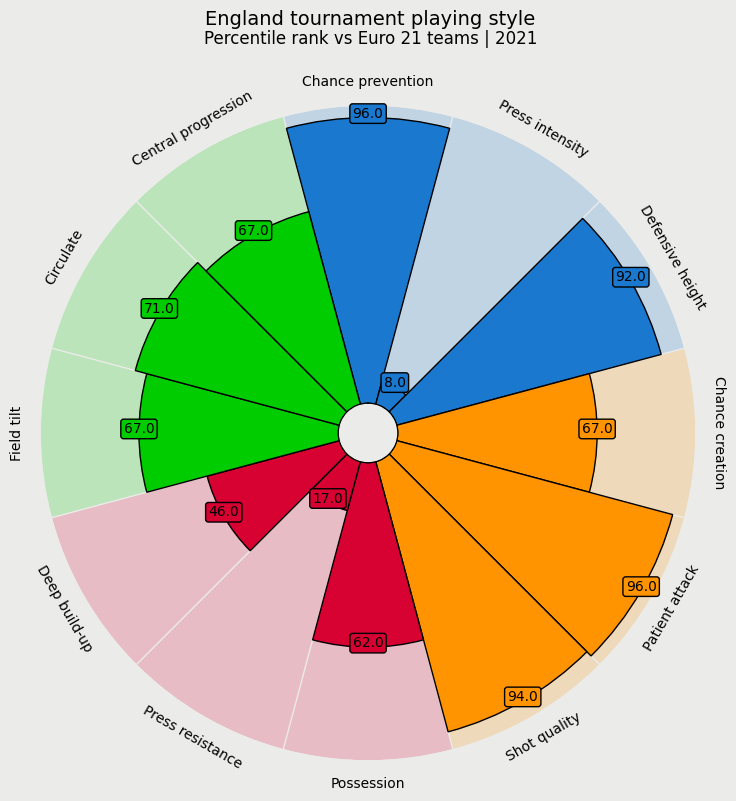

In [31]:
# plot pizza
fig, ax = baker.make_pizza(
    values,                          # list of values
    figsize=(10, 8.5),                # adjust figsize according to your need
    color_blank_space="same",        # use same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.2,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#000000", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="000000", fontsize=10,
        va="center", alpha=1
    ),                               # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=10, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values
)
# add title
fig.text(
    0.515, 0.975, "England tournament playing style", size=14,
    ha="center", color="#000000"
)
# add subtitle
fig.text(
    0.515, 0.953,
    "Percentile rank vs Euro 21 teams | 2021",
    size=12,
    ha="center", color="#000000"
)

In [32]:
fig.savefig('C:/Users/Louis/OneDrive/Documents/Python/images/plots/eng-euro-style.png', dpi=300, bbox_inches='tight')